## NBA Dataset

In [24]:
import pandas as pd
import numpy as np
from scipy import stats
import statistics
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [25]:
df=pd.read_csv("nba.csv")
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [26]:
df=df.iloc[:-1,:] #(slicing) takes all the rows leaving last row
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [27]:
df["College"].fillna(df["College"].mode()[0],inplace=True) #replacing all null values by mode
df["Salary"].fillna(df['Salary'].mean(),inplace=True) #replacing all null values by mean

In [28]:
#categorizing the data 
def convert(x):
    if(x<=25):
        return "Age<=25"
    elif (x<=30):
        return "25<Age<=30"
    elif (x<=35):
        return "30<Age<=35"
    else:
        return "Age>35"
df["Age"]=df["Age"].apply(convert) 

In [29]:
df_desc=df.groupby("Age")["Salary"].describe() #grouping the data according to age and then describing the salary col
df_desc

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
25<Age<=30,167.0,6.388329e+06,5.603849e+06,55722.0,1444980.00,4.842684e+06,9.825000e+06,22359364.0
30<Age<=35,68.0,6.635271e+06,6.238296e+06,200600.0,2096417.75,4.671342e+06,9.667979e+06,22970500.0
Age<=25,199.0,3.030670e+06,3.536368e+06,30888.0,947276.00,1.709719e+06,3.495566e+06,16407501.0
Age>35,23.0,3.997994e+06,5.155445e+06,222888.0,947276.00,2.854940e+06,4.921342e+06,25000000.0


### Mean

In [30]:
df_mean=df.groupby(df["Age"]).mean()["Salary"]#group by data according to age and taking mean of the salary
df_mean

Age
25<Age<=30    6.388329e+06
30<Age<=35    6.635271e+06
Age<=25       3.030670e+06
Age>35        3.997994e+06
Name: Salary, dtype: float64

In [31]:
for i in ["25<Age<=30","30<Age<=35","Age<=25","Age>35"]:
    a=list(df[df["Age"]==i]["Salary"]) #manually calculating the mean of the data set
    print(i,":",sum(a)/len(a))

25<Age<=30 : 6388329.116296554
30<Age<=35 : 6635271.001549723
Age<=25 : 3030670.213703045
Age>35 : 3997994.482842659


### Median

In [32]:
df_median=df.groupby(df["Age"])["Salary"].median()
df_median

Age
25<Age<=30    4.842684e+06
30<Age<=35    4.671342e+06
Age<=25       1.709719e+06
Age>35        2.854940e+06
Name: Salary, dtype: float64

In [33]:
for i in ["25<Age<=30","30<Age<=35","Age<=25","Age>35"]:
    a=list(df[df["Age"]==i]["Salary"])
    
    a.sort()
    if(len(a)%2):
        print(i,":",a[len(a)//2])
    else:
        print(i,":",(a[len(a)//2]+a[len(a)//2-1])/2)

25<Age<=30 : 4842684.105381166
30<Age<=35 : 4671342.052690582
Age<=25 : 1709719.0
Age>35 : 2854940.0


### Mode

In [34]:
df_mode=df.groupby(df["Age"])["Salary"].agg(lambda x:x.value_counts().index[0]) #calculating the mode
df_mode

Age
25<Age<=30    947276.0
30<Age<=35    947276.0
Age<=25       845059.0
Age>35        947276.0
Name: Salary, dtype: float64

In [35]:
from collections import Counter
for i in ["25<Age<=30","30<Age<=35","Age<=25","Age>35"]:
    a=list(df[df["Age"]==i]["Salary"])
    c = Counter(a) #frequency array or map in c++
    print(i,": ",[k for k, v in c.items() if v == c.most_common(1)[0][1]][0]) #printing the data

25<Age<=30 :  947276.0
30<Age<=35 :  947276.0
Age<=25 :  845059.0
Age>35 :  947276.0


### Min

In [36]:
df_min=df.groupby(df["Age"])["Salary"].min()
df_min

Age
25<Age<=30     55722.0
30<Age<=35    200600.0
Age<=25        30888.0
Age>35        222888.0
Name: Salary, dtype: float64

In [37]:
for i in ["25<Age<=30","30<Age<=35","Age<=25","Age>35"]:
    a=list(df[df["Age"]==i]["Salary"])
    print(i,":",min(a))

25<Age<=30 : 55722.0
30<Age<=35 : 200600.0
Age<=25 : 30888.0
Age>35 : 222888.0


### Max

In [38]:
df_max=df.groupby(df["Age"])["Salary"].max()
df_max

Age
25<Age<=30    22359364.0
30<Age<=35    22970500.0
Age<=25       16407501.0
Age>35        25000000.0
Name: Salary, dtype: float64

In [39]:
for i in ["25<Age<=30","30<Age<=35","Age<=25","Age>35"]:
    a=list(df[df["Age"]==i]["Salary"])
    print(i,":",max(a))

25<Age<=30 : 22359364.0
30<Age<=35 : 22970500.0
Age<=25 : 16407501.0
Age>35 : 25000000.0


### Standard Deviation

In [40]:
df_std=df.groupby(df["Age"])["Salary"].std()
df_std

Age
25<Age<=30    5.603849e+06
30<Age<=35    6.238296e+06
Age<=25       3.536368e+06
Age>35        5.155445e+06
Name: Salary, dtype: float64

In [41]:
#optional (dont write this in viva)
for i in ["25<Age<=30","30<Age<=35","Age<=25","Age>35"]:
    a=list(df[df["Age"]==i]["Salary"])
    avg=sum(a)/len(a)
    dev=0
    for j in a:
        dev+=(j-avg)**2
    dev/=(len(a)-1)
    dev=dev**0.5
    print(i,":",dev)

25<Age<=30 : 5603849.071904012
30<Age<=35 : 6238295.9101663465
Age<=25 : 3536368.304752463
Age>35 : 5155444.659946214


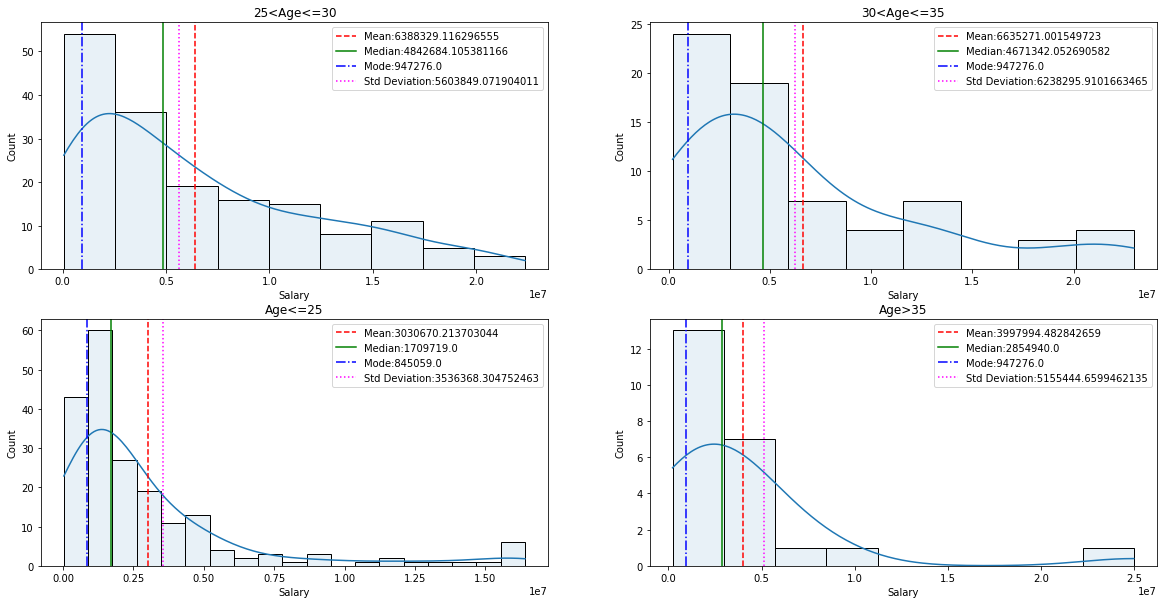

In [42]:
fig, axes = plt.subplots(2,2,figsize=(20,10))
m,n=0,0
j=0
for i in ["25<Age<=30","30<Age<=35","Age<=25","Age>35"]: 
    mean=df_desc.iloc[j,:]["mean"]
    median=df_desc.iloc[j,:]["50%"] #median
    mode=df_mode[i]
    stdev=df_std[i]

    sns.histplot(data=df[df["Age"]==i], x="Salary", ax=axes[m,n], kde=True,alpha=0.1) #histogram
    axes[m,n].axvline(mean, color='r', linestyle='--', label="Mean:"+str(mean)) #doted lines
    axes[m,n].axvline(median, color='g', linestyle='-', label="Median:"+str(median)) #doted lines
    axes[m,n].axvline(mode, color='b', linestyle='-.', label="Mode:"+str(mode)) #doted lines
    axes[m,n].axvline(stdev, color='magenta', linestyle=':', label="Std Deviation:"+str(stdev)) #doted lines
    axes[m,n].legend() #doted lines

    axes[m,n].set_title(i) #setting the titles
    n+=1
    if(n==2):
        m,n=1,0
    j+=1
plt.show()

## Iris Dataset

In [43]:
df=pd.read_csv("Iris.csv")
df.drop("Id",axis=1,inplace=True) #dropping the id column

In [44]:
df_desc=df.groupby("Species").describe() #grouping the data by species
df_desc

SepalLengthCm                                              \
                        count   mean       std  min    25%  50%  75%  max   
Species                                                                     
Iris-setosa              50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor          50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica           50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                SepalWidthCm         ... PetalLengthCm      PetalWidthCm  \
                       count   mean  ...           75%  max        count   
Species                              ...                                   
Iris-setosa             50.0  3.418  ...         1.575  1.9         50.0   
Iris-versicolor         50.0  2.770  ...         4.600  5.1         50.0   
Iris-virginica          50.0  2.974  ...         5.875  6.9         50.0   

                                                           
                  mean       std  min  25%  50%  75%  max  
Species                                                    
Iris-setosa      0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [45]:
df.isnull().sum() #print count of the null values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Mean

In [46]:
df_mean=df.groupby("Species").mean() #calculating the mean
df_mean

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


### Median

In [47]:
df_median=df.groupby("Species").median()
df_median

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


### Mode

In [48]:
df_mode=df.groupby("Species").agg(lambda x:x.value_counts().index[0])
df_mode

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.1,3.4,1.5,0.2
Iris-versicolor,5.5,3.0,4.5,1.3
Iris-virginica,6.3,3.0,5.1,1.8


### Min

In [49]:
df_min=df.groupby("Species").min()
df_min

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,4.3,2.3,1.0,0.1
Iris-versicolor,4.9,2.0,3.0,1.0
Iris-virginica,4.9,2.2,4.5,1.4


### Max

In [50]:
df_max=df.groupby("Species").max()
df_max

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.8,4.4,1.9,0.6
Iris-versicolor,7.0,3.4,5.1,1.8
Iris-virginica,7.9,3.8,6.9,2.5


### Standard Deviation

In [51]:
df_std=df.groupby("Species").std()
df_std

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


### Graph for Iris-setosa

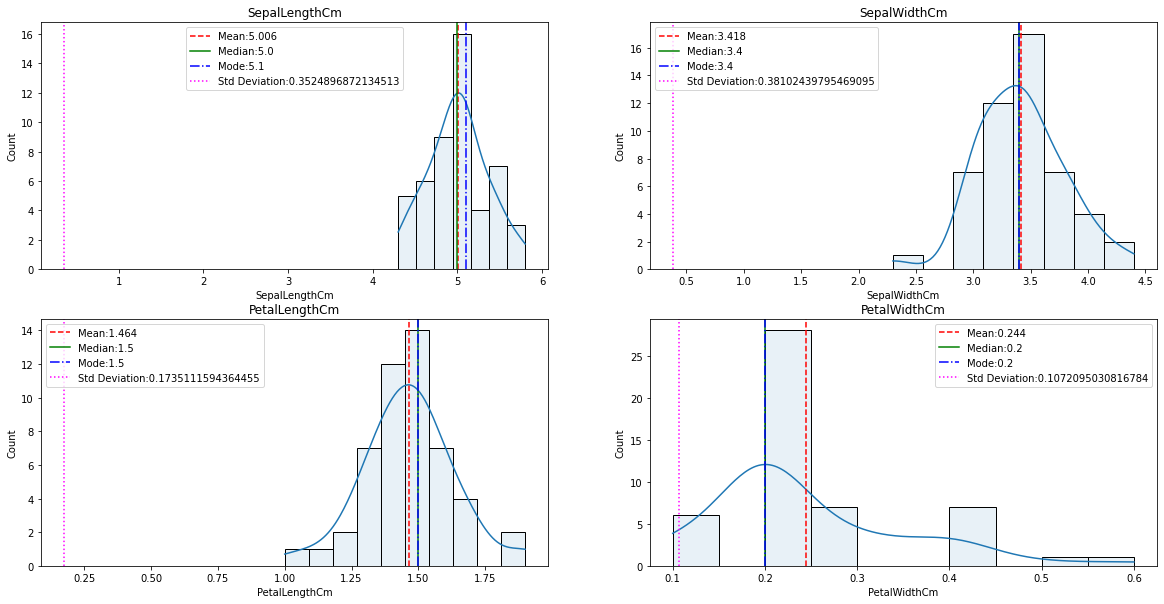

In [52]:
fig, axes = plt.subplots(2,2,figsize=(20,10))
m,n=0,0

species=["Iris-setosa","Iris-versicolor","Iris-virginica"]
p=0
for i in ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]: 
    mean=df_desc.iloc[p,:][i]["mean"] #mean
    median=df_desc.iloc[p,:][i]["50%"] #median 
    mode=df_mode.iloc[p,:][i] #mode
    stdev=df_std.iloc[p,:][i] #standard deviation

    sns.histplot(data=df[df["Species"]==species[p]], x=i, ax=axes[m,n], kde=True,alpha=0.1) #drawing histogram
    axes[m,n].axvline(mean, color='r', linestyle='--', label="Mean:"+str(mean))
    axes[m,n].axvline(median, color='g', linestyle='-', label="Median:"+str(median))
    axes[m,n].axvline(mode, color='b', linestyle='-.', label="Mode:"+str(mode))
    axes[m,n].axvline(stdev, color='magenta', linestyle=':', label="Std Deviation:"+str(stdev))
    axes[m,n].legend()

    axes[m,n].set_title(i)
    n+=1
    if(n==2):
        m,n=1,0
    
  
plt.show()

### Graph for Iris-versicolor

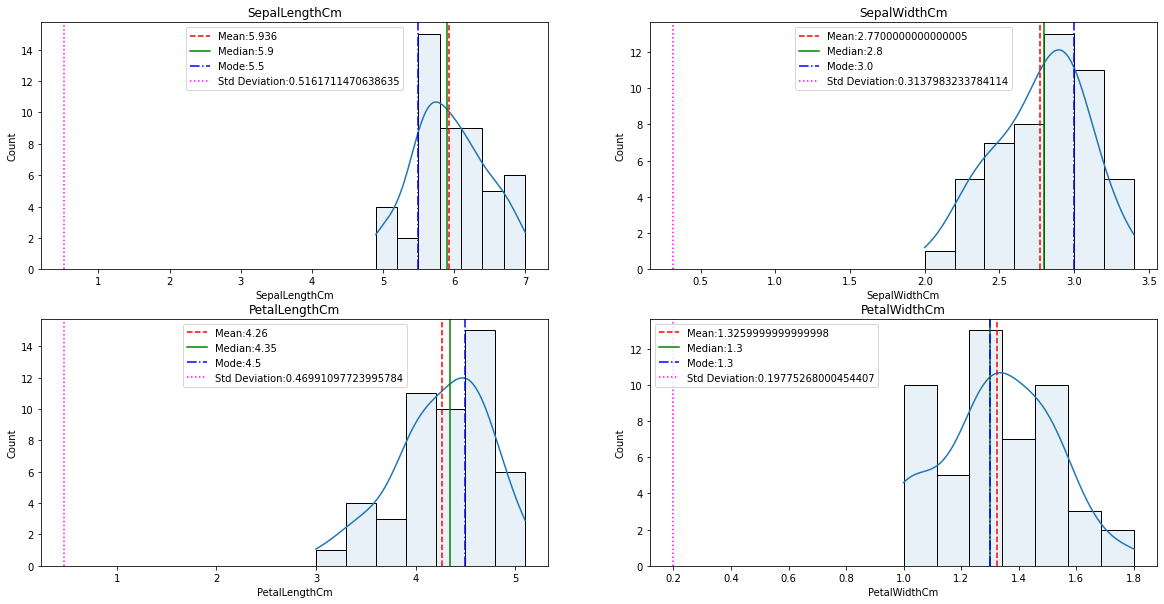

In [53]:
fig, axes = plt.subplots(2,2,figsize=(20,10))
m,n=0,0

species=["Iris-setosa","Iris-versicolor","Iris-virginica"]
p=1
for i in ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]: 
    mean=df_desc.iloc[p,:][i]["mean"]
    median=df_desc.iloc[p,:][i]["50%"]
    mode=df_mode.iloc[p,:][i]
    stdev=df_std.iloc[p,:][i]

    sns.histplot(data=df[df["Species"]==species[p]], x=i, ax=axes[m,n], kde=True,alpha=0.1)
    axes[m,n].axvline(mean, color='r', linestyle='--', label="Mean:"+str(mean))
    axes[m,n].axvline(median, color='g', linestyle='-', label="Median:"+str(median))
    axes[m,n].axvline(mode, color='b', linestyle='-.', label="Mode:"+str(mode))
    axes[m,n].axvline(stdev, color='magenta', linestyle=':', label="Std Deviation:"+str(stdev))
    axes[m,n].legend()

    axes[m,n].set_title(i)
    n+=1
    if(n==2):
        m,n=1,0
    
  
plt.show()

### Graph for Iris-virginica

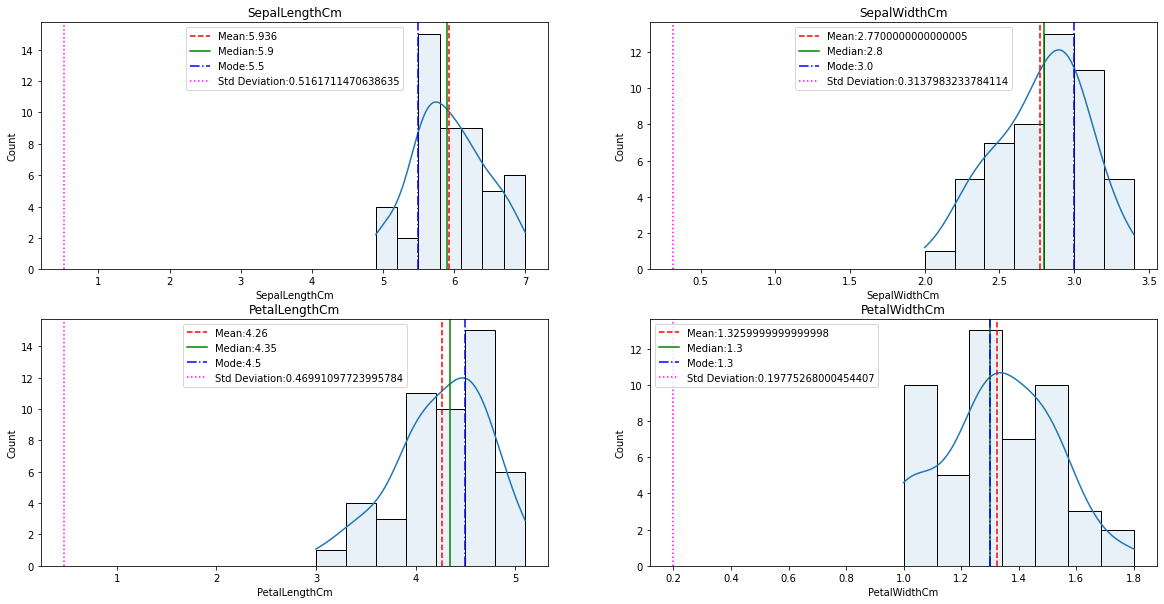

In [54]:
fig, axes = plt.subplots(2,2,figsize=(20,10))
m,n=0,0

species=["Iris-setosa","Iris-versicolor","Iris-virginica"]
p=1
for i in ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]: 
    mean=df_desc.iloc[p,:][i]["mean"]
    median=df_desc.iloc[p,:][i]["50%"]
    mode=df_mode.iloc[p,:][i]
    stdev=df_std.iloc[p,:][i]

    sns.histplot(data=df[df["Species"]==species[p]], x=i, ax=axes[m,n], kde=True,alpha=0.1)
    axes[m,n].axvline(mean, color='r', linestyle='--', label="Mean:"+str(mean))
    axes[m,n].axvline(median, color='g', linestyle='-', label="Median:"+str(median))
    axes[m,n].axvline(mode, color='b', linestyle='-.', label="Mode:"+str(mode))
    axes[m,n].axvline(stdev, color='magenta', linestyle=':', label="Std Deviation:"+str(stdev))
    axes[m,n].legend()

    axes[m,n].set_title(i)
    n+=1
    if(n==2):
        m,n=1,0
    
  
plt.show()